In [1]:
%matplotlib inline
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
# File to Load (Remember to change these)
FavTeamResults = "FavTeamPerc.csv" 
FavTeamResults2 = "FavTeamPerc3.csv" 

In [3]:
# Read % of total fans favorite overall team data
fav_df = pd.read_csv(FavTeamResults)
fav_df2 = pd.read_csv(FavTeamResults2)

In [4]:
fav_df2 = pd.pivot_table(fav_df2,index=["Market_size", "Year.1", "Year"],values=["% of All Fans Ranking Team As Favorite"],aggfunc=np.mean)
fav_df2

% of All Fans Ranking Team As Favorite
Market_size Year.1 Year                                                          
Big         2013   Brooklyn Nets                                              1.6
                   Chicago Bulls                                             10.4
                   Dallas Mavericks                                           4.8
                   Houston Rockets                                            3.0
                   Los Angeles Clippers                                       1.2
                   Los Angeles Lakers                                         9.3
                   New York Knicks                                            5.8
                   Philadelphia 76ers                                         2.1
                   Toronto Raptors                                            0.1
                   Washington Wizards                                         0.7
            2015   Brooklyn Nets                                              1.8
                   Chicago Bulls                                             10.9
                   Dallas Mavericks                                           4.3
                   Houston Rockets                                            2.9
                   Los Angeles Clippers                                       2.4
                   Los Angeles Lakers                                        10.2
                   New York Knicks                                            4.7
                   Philadelphia 76ers                                         2.4
                   Toronto Raptors                                            0.1
                   Washington Wizards                                         0.5
            2016   Brooklyn Nets                                              0.9
                   Chicago Bulls                                             11.0
                   Dallas Mavericks                                           2.9
                   Houston Rockets                                            2.5
                   Los Angeles Clippers                                       1.1
                   Los Angeles Lakers                                        10.2
                   New York Knicks                                            4.2
                   Philadelphia 76ers                                         2.3
                   Toronto Raptors                                            0.4
                   Washington Wizards                                         0.9
...                                                                           ...
Small       2015   Charlotte Hornets                                          1.9
                   Indiana Pacers                                             1.3
                   Memphis Grizzlies                                          0.7
                   Milwaukee Bucks                                            1.4
                   New Orleans Pelicans                                       1.3
                   Oklahoma City Thunder                                      1.6
                   Portland Trail Blazers                                     2.0
                   Sacramento Kings                                           1.1
                   San Antonio Spurs                                          4.2
                   Utah Jazz                                                  1.2
            2016   Charlotte Hornets                                          1.5
                   Indiana Pacers                                             1.6
                   Memphis Grizzlies                                          0.5
                   Milwaukee Bucks                                            1.4
                   New Orleans Pelicans                                       0.6
                   Oklahoma City Thunder                                      1.9
                   Portla

Text(0.5,1,'% of All NBA Fans Favorite Teams 2013-2017')

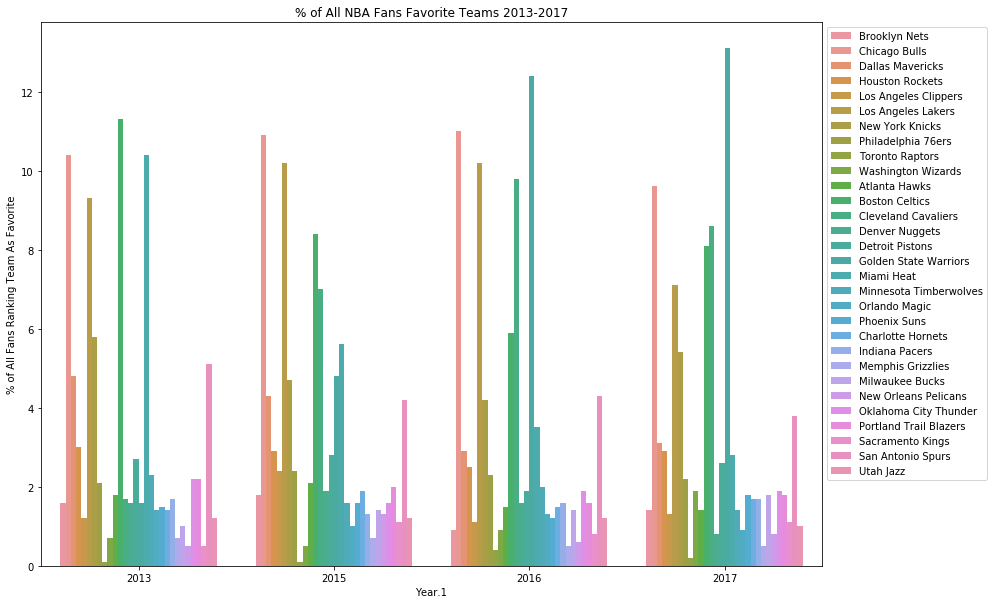

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
sns.barplot(x="Year.1", y="% of All Fans Ranking Team As Favorite", data=fav_df2.reset_index(), hue="Year")
plt.legend(loc=2, bbox_to_anchor=(1, 1))
plt.title('% of All NBA Fans Favorite Teams 2013-2017')

In [6]:
df_2 = 'FavTeamPerc3.csv'
ftp_df2 = pd.read_csv(df_2, low_memory=False)

ftp_df2 = ftp_df2[['Market_size','Year']].drop_duplicates()

In [7]:
ftp_df2

Market_size                    Year
0           Big         New York Knicks
4           Big           Brooklyn Nets
8           Big      Los Angeles Lakers
12          Big    Los Angeles Clippers
16          Big           Chicago Bulls
20          Big         Toronto Raptors
24          Big      Philadelphia 76ers
28          Big        Dallas Mavericks
32          Big      Washington Wizards
36          Big         Houston Rockets
40          Mid   Golden State Warriors
44          Mid           Atlanta Hawks
48          Mid          Boston Celtics
52          Mid            Phoenix Suns
56          Mid         Detroit Pistons
60          Mid  Minnesota Timberwolves
64          Mid              Miami Heat
68          Mid          Denver Nuggets
72          Mid           Orlando Magic
76          Mid     Cleveland Cavaliers
80        Small        Sacramento Kings
84        Small  Portland Trail Blazers
88        Small       Charlotte Hornets
92        Small          Indiana Pacers
96        Small               Utah Jazz
100       Small       San Antonio Spurs
104       Small         Milwaukee Bucks
108       Small   Oklahoma City Thunder
112       Small       Memphis Grizzlies
116       Small    New Orleans Pelicans

In [8]:
fav_df_modified= fav_df.merge(ftp_df2,how = 'left',on = 'Year')
bigDF = fav_df_modified.loc[fav_df_modified.Market_size == "Big"].drop(columns = 'Market_size')
midDF = fav_df_modified.loc[fav_df_modified.Market_size == "Mid"].drop(columns = 'Market_size')
smallDF = fav_df_modified.loc[fav_df_modified.Market_size == "Small"].drop(columns = 'Market_size')

([<matplotlib.axis.XTick at 0xa86d0b0>,
 <a list of 4 Text xticklabel objects>)

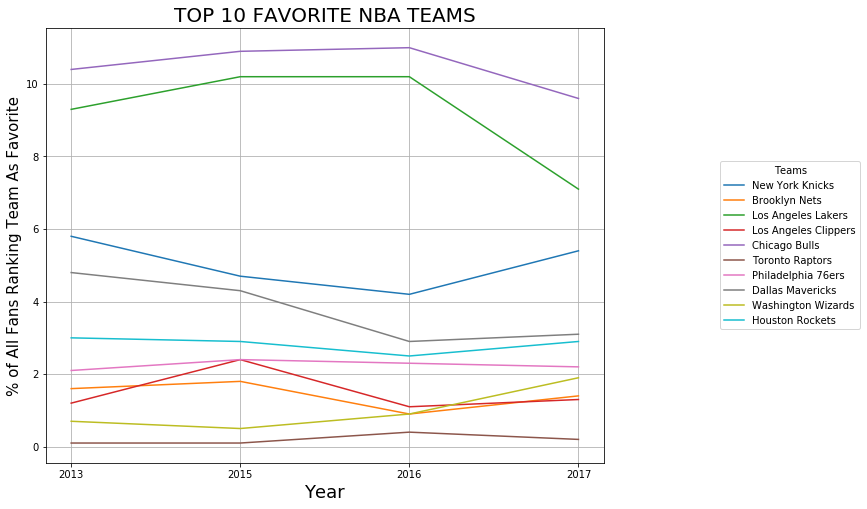

In [10]:
dfTransposed = bigDF.set_index("Year").T


dfTransposed.index

dfTransposed.reset_index(inplace = True)

dfTransposed['index']

my_xticks = dfTransposed['index']
dfTransposed.plot()
plt.grid()

plt.legend(loc = "center left" , bbox_to_anchor = (1.2, .5) , title = "Teams")
plt.title("TOP 10 FAVORITE NBA TEAMS" , size = 20)
plt.xlabel("Year", size = 18)
plt.ylabel("% of All Fans Ranking Team As Favorite" , size = 15)
plt.gcf().set_size_inches(10 , 8 , forward = True)
plt.xticks(dfTransposed.index,my_xticks)

([<matplotlib.axis.XTick at 0xa91b8b0>,
 <a list of 4 Text xticklabel objects>)

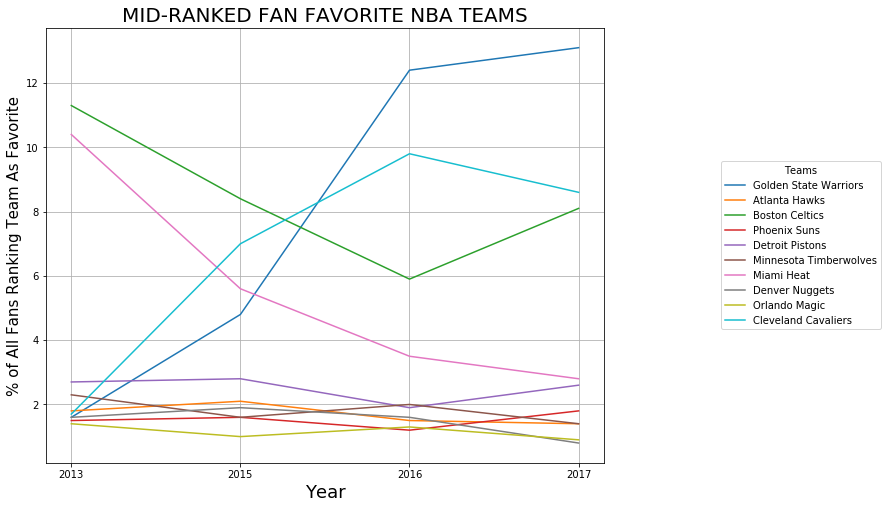

In [11]:
dfTransposed = midDF.set_index("Year").T


dfTransposed.index

dfTransposed.reset_index(inplace = True)

dfTransposed['index']

my_xticks = dfTransposed['index']
dfTransposed.plot()
plt.grid()

plt.legend(loc = "center left" , bbox_to_anchor = (1.2, .5) , title = "Teams")
plt.title("MID-RANKED FAN FAVORITE NBA TEAMS" , size = 20)
plt.xlabel("Year", size = 18)
plt.ylabel("% of All Fans Ranking Team As Favorite" , size = 15)
plt.gcf().set_size_inches(10 , 8 , forward = True)
plt.xticks(dfTransposed.index,my_xticks)

([<matplotlib.axis.XTick at 0xa821f90>,
 <a list of 4 Text xticklabel objects>)

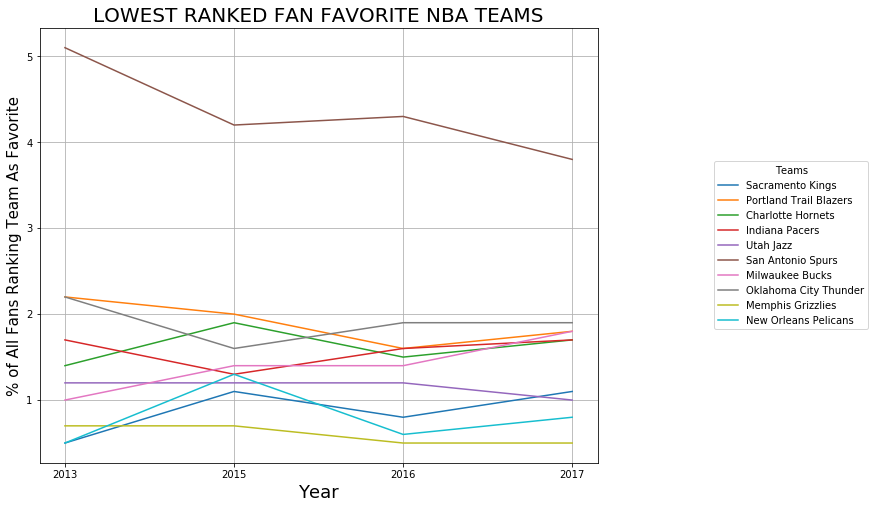

In [12]:
dfTransposed = smallDF.set_index("Year").T


dfTransposed.index

dfTransposed.reset_index(inplace = True)

dfTransposed['index']

my_xticks = dfTransposed['index']
dfTransposed.plot()
plt.grid()

plt.legend(loc = "center left" , bbox_to_anchor = (1.2, .5) , title = "Teams")
plt.title("LOWEST RANKED FAN FAVORITE NBA TEAMS" , size = 20)
plt.xlabel("Year", size = 18)
plt.ylabel("% of All Fans Ranking Team As Favorite" , size = 15)
plt.gcf().set_size_inches(10 , 8 , forward = True)
plt.xticks(dfTransposed.index,my_xticks)

([<matplotlib.axis.XTick at 0xa9ecb10>,
 <a list of 4 Text xticklabel objects>)

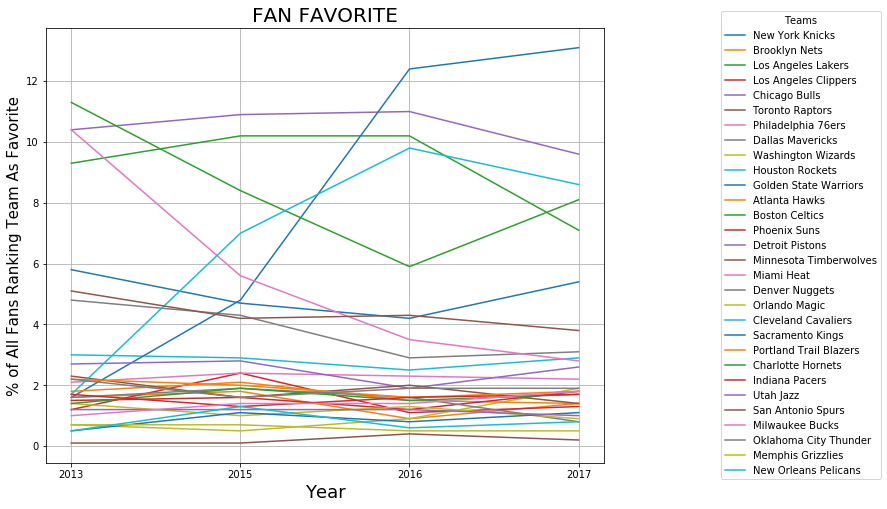

In [13]:
dfTransposed = fav_df.set_index("Year").T


dfTransposed.index

dfTransposed.reset_index(inplace = True)

dfTransposed['index']

my_xticks = dfTransposed['index']
dfTransposed.plot()
plt.grid()

plt.legend(loc = "center left" , bbox_to_anchor = (1.2, .5) , title = "Teams")
plt.title("FAN FAVORITE" , size = 20)
plt.xlabel("Year", size = 18)
plt.ylabel("% of All Fans Ranking Team As Favorite" , size = 15)
plt.gcf().set_size_inches(10 , 8 , forward = True)
plt.xticks(dfTransposed.index,my_xticks)

In [ ]:
# bigMarkets = ftp_df2.loc[ftp_df2.Market_size == "Big"][['Year','Year.1','% of All Fans Ranking Team As Favorite']]